
### Demo 2 - Performance Measurements

In this demo, you will use performance measurements like ROC, SMOTE to evaluate the model using scikit-learn library.

---

## Problem Statement

The dataset contain details of users like User ID, Gender, Age, EstimatedSalary and Purchased. The data shows whether a person is likely to purchase the artefacts advertised or not. Based on the data we have to generate a model that can predict whether the person will make a purchase or not.

---

## Importing Required Libraries

In [ ]:
#!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing  import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns

---

## Importing Dataset

In [3]:
#Importing the dataset using pandas
ad_data=pd.read_csv('Social_Network_Ads.csv')
ad_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Data Analysis

In [4]:
#Dataset shape to get number of rows and columns
ad_data.shape

(400, 5)

<div style="background-color:##EDF9FF">
  <ul><li><h3>Checking Null Values</h3></li></ul>
</div>

In [5]:
#Checking for null values
ad_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

<div style="background-color:##FBFFE3">
    <div style="float:left">
        <img src='https://drive.google.com/uc?export=download&id=1gpc8kbwaenTpaIvnO_MQR3vw12rKYQrJ', width=20,height=20,>
    </div>
    <span style="padding:20px;">
        None of the columns contain null values so there is no need to remove/replace data
    </span>
</div>

<div style="background-color:##EDF9FF">
  <ul><li><h3>Is Data Balanced?</h3></li></ul>
</div>

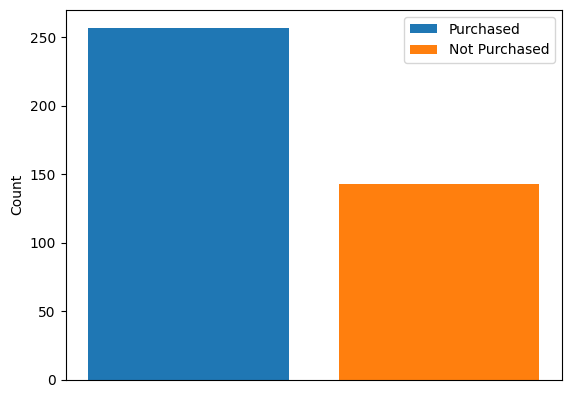

In [6]:
purchased=ad_data[ad_data.Purchased==0].Purchased.count()
notpurchased=ad_data[ad_data.Purchased==1].Purchased.count()
plt.bar(0,purchased,label='Purchased')
plt.bar(1,notpurchased,label='Not Purchased')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

- Dataset is clearly imbalanced

## Splitting Dependent And Independent Variables

In [7]:
#Eliminating User ID and Gender as they would not have any impact
X=ad_data[['Age','EstimatedSalary']]
y=ad_data['Purchased']

In [8]:
#Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

## SMOTE

In [10]:
#Over sampling the dataset

smt=SMOTE()
oX_train, oy_train = smt.fit_resample(X_train, y_train)

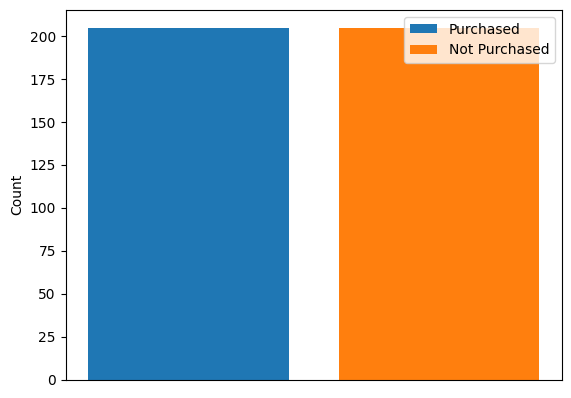

In [11]:
#Checking newly oversampled data
_, counts=np.unique(oy_train,return_counts=True)


purchased=counts[0]
notpurchased=counts[1]


plt.bar(0,purchased,label='Purchased')
plt.bar(1,notpurchased,label='Not Purchased')
plt.xticks([])
plt.ylabel('Count')
plt.legend()
plt.show()

## Training the model

<div style="background-color:##EDF9FF">
  <ul><li><h3>Logistic Regression</h3></li></ul>
</div>

In [12]:
logreg = LogisticRegression(C=1,solver='liblinear', multi_class='ovr')
logreg.fit(oX_train,oy_train)

c:\Workspace\MyProjects\MachineLearning\ml_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

<div style="background-color:##EDF9FF">
  <ul><li><h3>Decision Tree</h3></li></ul>
</div>

In [13]:
d_tree=DecisionTreeClassifier(criterion='entropy',splitter='best')
d_tree.fit(oX_train,oy_train)

DecisionTreeClassifier(criterion='entropy')

## Confusion Matrix

<div style="background-color:##EDF9FF">
  <ul><li><h3>Logistic Regression</h3></li></ul>
</div>

In [14]:
l_pred=logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, l_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

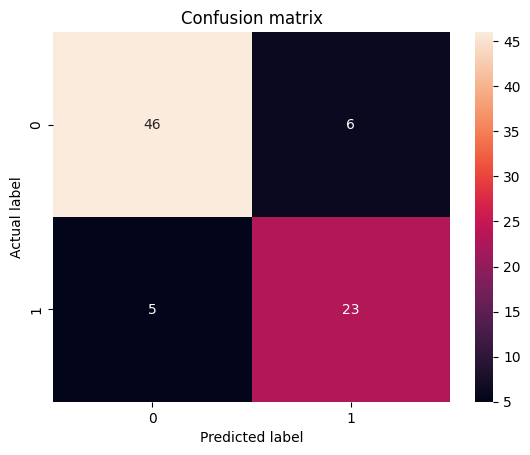

In [15]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, l_pred))
print("Precision:",metrics.precision_score(y_test, l_pred))
print("Recall:",metrics.recall_score(y_test, l_pred))

Accuracy: 0.8625
Precision: 0.7931034482758621
Recall: 0.8214285714285714


<div style="background-color:##EDF9FF">
  <ul><li><h3>Decision Tree</h3></li></ul>
</div>

In [17]:
d_pred=d_tree.predict(X_test)
cnf_matrix = confusion_matrix(y_test, d_pred)


Text(0.5, 23.52222222222222, 'Predicted label')

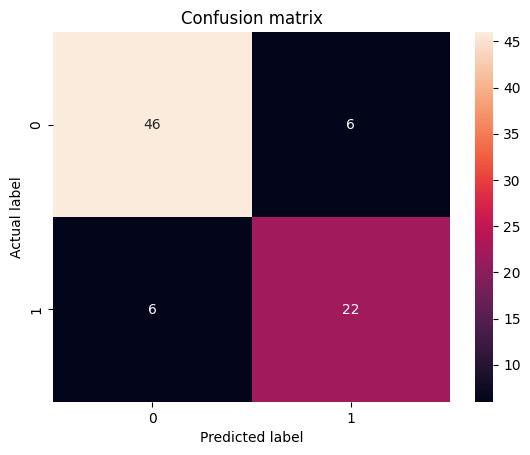

In [18]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, d_pred))
print("Precision:",metrics.precision_score(y_test, d_pred))
print("Recall:",metrics.recall_score(y_test, d_pred))

Accuracy: 0.85
Precision: 0.7857142857142857
Recall: 0.7857142857142857


## ROC Curve

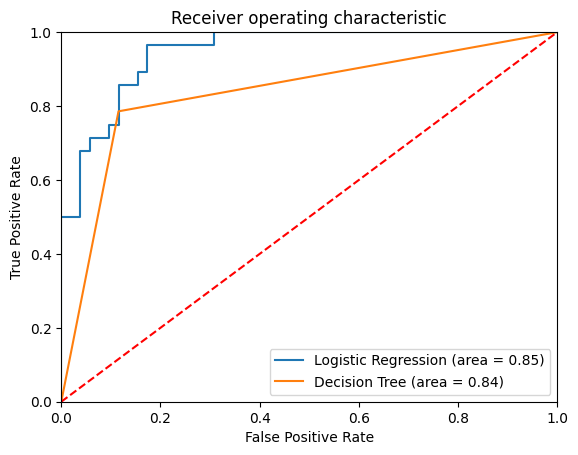

In [20]:
plt.figure()
#For logistic regression
logit_roc_auc = metrics.roc_auc_score(y_test, logreg.predict(X_test))
lfpr, ltpr, lthresholds = metrics.roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.plot(lfpr, ltpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#For Decision Tree
decision_roc_auc = metrics.roc_auc_score(y_test, d_tree.predict(X_test))
dfpr, dtpr, lthresholds = metrics.roc_curve(y_test, d_tree.predict_proba(X_test)[:,1])
plt.plot(dfpr, dtpr, label='Decision Tree (area = %0.2f)' % decision_roc_auc)


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


<b><i>Conclusion</i></b>: In this demonstration, we have gained an understanding on how to apply preformance measurements to evaluate the model.